In [22]:
import scipy.stats as stats
import seaborn as sns
import numpy as np
from scipy import special as special
import math

In [23]:
populationData = np.random.normal(loc = 50 , scale = 25, size = 100000)
sampleData1 = np.random.choice(populationData, 100)
sampleData2 = np.random.choice(populationData, 100)

In [24]:
class Ttest_2sample:
    
    def __init__(self, sampleData1, sampleData2):
        
        self.sampleData1 = sampleData1
        self.sampleData2 = sampleData2
        
        
        #calculate  mean, std for both samples
        self.xBar1, self.xBar2 = np.mean(self.sampleData1), np.mean(self.sampleData2)
        sampleVar1, sampleVar2 = np.var(self.sampleData1), np.var(self.sampleData2)
        n1, n2 = len(self.sampleData1),  len(self.sampleData2)
        
        #caluclate degrees of freedom
        dfnum = (sampleVar1**2/n1 + sampleVar2**2/n2)**2
        dfdenom = (sampleVar1**2/n1)**2/n1-1 + (sampleVar2**2/n2)**2/n2-1
        df = math.floor(dfnum/dfdenom)
        
        #calculate avg. standard error for both samples
        standardErrorMean1, standardErrorMean2 =  sampleVar1/n1, sampleVar2/n2
        
        #t-statistic = difference of means/sqrt(sum of avg standard error)
        self.t = (self.xBar1-self.xBar2)/np.sqrt(standardErrorMean1+standardErrorMean2)
        
        #given a student's t-distribution, calculate the probability that we would observe a t-statistic equal or more extreme than the one we calculated.
            #( t <= -abs(caluclated t-statistic) or t >= abs(caluclated t-statistic) )
        self.pValue = stats.t.cdf(x = -np.abs(self.t), df= df) * 2
        
    
    def runTest(self, alpha = 0.05):
        return ({'t': self.t,
                 'p-value': self.pValue, 
                 'statSig':self.pValue < alpha, #difference is stat sig if pValue < user-defined alpha
                 'sampleMean1': self.xBar1,
                 'sampleMean2': self.xBar2,
                 'meanDiff': self.xBar1-self.xBar2
                })

{'t': -0.862496685861606,
 'p-value': 0.3894524564767222,
 'statSig': False,
 'sampleMean1': 49.26333362642016,
 'sampleMean2': 52.057806210604966,
 'meanDiff': -2.7944725841848026}

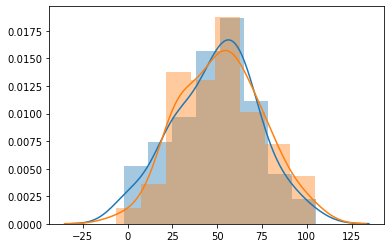

In [25]:
sns.distplot(sampleData1)
sns.distplot(sampleData2)

Ttest_2sample(sampleData1, sampleData2).runTest()

In [28]:
stats.ttest_ind(sampleData1,sampleData3)

Ttest_indResult(statistic=-7.5681610136990445, pvalue=1.3997522492832822e-12)